In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

In [3]:
# Grid of x, y points
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

In [4]:
# Create a multipole with nq charges of alternating sign, equally spaced
# on the unit circle.
nq = 2**int(1)
charges = []
for i in range(nq):
    q = i%2 * 2 - 1
    charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

In [5]:
# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

(1.0, 0.0)
(-1.0, 1.2246467991473532e-16)


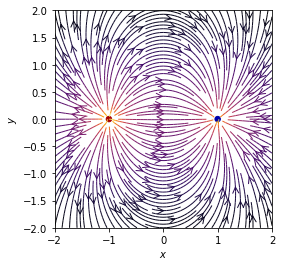

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    print(pos)
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()